# Importing Packages

In [1]:
# Importing python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics

# To remove any warnings
warnings.filterwarnings('ignore')

# Importing DataFrame

In [2]:
# load dataset into Pandas dataframe
df = pd.read_csv('DataSet.csv')
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Data Wrangling

In [3]:
# Dropping irrelevant columns
df.drop(['Unnamed: 0'], axis=1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
# Identifying columns that have missing data with the symbol '?'
df.isin(['?']).any()

Unnamed: 0           False
symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [5]:
# Identifying the number of missing values '?' in each column
print("\nnormalized-losses =", df[df['normalized-losses'] == '?']['normalized-losses'].count())
print("num-of-doors =", df[df['num-of-doors'] == '?']['num-of-doors'].count())
print("bore =", df[df['bore'] == '?']['bore'].count())
print("stroke =", df[df['stroke'] == '?']['stroke'].count())
print("horsepower =", df[df['horsepower'] == '?']['horsepower'].count())
print("peak-rpm =", df[df['peak-rpm'] == '?']['peak-rpm'].count())
print("price =", df[df['price'] == '?']['price'].count())


normalized-losses = 41
num-of-doors = 2
bore = 4
stroke = 4
horsepower = 2
peak-rpm = 2
price = 4


In [6]:
# Replace '?' with a null value (NaN)
df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan)
df['num-of-doors'] = df['num-of-doors'].replace('?', np.nan)
df['bore'] = df['bore'].replace('?', np.nan)
df['stroke'] = df['stroke'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['peak-rpm'] = df['peak-rpm'].replace('?', np.nan)
df['price'] = df['price'].replace('?', np.nan)
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
# Identifying the number of missing values '?' in each column
# Ensuring that all '?' values have been changed to NaN
print("\nnormalized-losses =", df[df['normalized-losses'] == '?']['normalized-losses'].count())
print("num-of-doors =", df[df['num-of-doors'] == '?']['num-of-doors'].count())
print("bore =", df[df['bore'] == '?']['bore'].count())
print("stroke =", df[df['stroke'] == '?']['stroke'].count())
print("horsepower =", df[df['horsepower'] == '?']['horsepower'].count())
print("peak-rpm =", df[df['peak-rpm'] == '?']['peak-rpm'].count())
print("price =", df[df['price'] == '?']['price'].count())


normalized-losses = 0
num-of-doors = 0
bore = 0
stroke = 0
horsepower = 0
peak-rpm = 0
price = 0


In [8]:
# Finding the number of null values in each column
df.isnull().sum() 

Unnamed: 0            0
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Converting columns' data types
df = df.astype({'normalized-losses': 'float', 'bore': 'float', 'stroke': 'float', 'horsepower': 'float', 
                'peak-rpm': 'float', 'price': 'float'})

# Printing information about each column including the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized-losses  164 non-null    float64
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       203 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [10]:
# Replacing null values with the respective mean of each column
df['normalized-losses'] = df['normalized-losses'].replace(np.nan, round(df['normalized-losses'].mean()))
df['bore'] = df['bore'].replace(np.nan, round(df['bore'].mean()))
df['stroke'] = df['stroke'].replace(np.nan, round(df['stroke'].mean()))
df['horsepower'] = df['horsepower'].replace(np.nan, round(df['horsepower'].mean()))
df['peak-rpm'] = df['peak-rpm'].replace(np.nan, round(df['peak-rpm'].mean()))
df['price'] = df['price'].replace(np.nan, round(df['price'].mean()))

# Replacing null values with the mode of the column
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [11]:
# Finding the number of null values in each column
# Ensuring there are no more null values in all columns
df.isnull().sum() 

Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode labels in the following columns
# Changes categorical data to numerical format
df['make'] = label_encoder.fit_transform(df['make'])
df['fuel-type'] = label_encoder.fit_transform(df['fuel-type'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['num-of-doors'] = label_encoder.fit_transform(df['num-of-doors'])
df['body-style'] = label_encoder.fit_transform(df['body-style'])
df['drive-wheels'] = label_encoder.fit_transform(df['drive-wheels'])
df['engine-location'] = label_encoder.fit_transform(df['engine-location'])
df['num-of-cylinders'] = label_encoder.fit_transform(df['num-of-cylinders'])
df['engine-type'] = label_encoder.fit_transform(df['engine-type'])
df['fuel-system'] = label_encoder.fit_transform(df['fuel-system'])
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,0,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,122.0,0,1,0,1,0,2,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,122.0,0,1,0,1,2,2,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,1,1,0,0,3,1,0,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,1,1,0,0,3,0,0,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95.0,21,1,0,0,3,2,0,...,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,201,-1,95.0,21,1,1,0,3,2,0,...,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,202,-1,95.0,21,1,0,0,3,2,0,...,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,203,-1,95.0,21,0,1,0,3,2,0,...,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [13]:
# Ensuring that Label Encoding is successful
# All values are numerical and not categorical
print("make", df['make'].unique())
print("fuel-type", df['fuel-type'].unique())
print("aspiration", df['aspiration'].unique())
print("num-of-doors", df['num-of-doors'].unique())
print("body-style", df['body-style'].unique())
print("drive-wheels", df['drive-wheels'].unique())
print("engine-location", df['engine-location'].unique())
print("num-of-cylinders", df['num-of-cylinders'].unique())
print("engine-type", df['engine-type'].unique())
print("fuel-system", df['fuel-system'].unique())

make [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
fuel-type [1 0]
aspiration [0 1]
num-of-doors [1 0]
body-style [0 2 3 4 1]
drive-wheels [2 1 0]
engine-location [0 1]
num-of-cylinders [2 3 1 4 5 6 0]
engine-type [0 5 3 2 6 4 1]
fuel-system [5 1 4 0 7 2 3 6]


In [14]:
# Identifying all columns' data types
# Ensure there are no more object (String) data types
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses    float64
make                   int32
fuel-type              int32
aspiration             int32
num-of-doors           int32
body-style             int32
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int32
num-of-cylinders       int32
engine-size            int64
fuel-system            int32
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Correlation Between Variables

In [15]:
# Displaying the correlation coefficient between all columns
df.corr()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.151621,-2.383063e-01,0.989349,-0.125568,0.067729,-0.178118,0.098303,0.051406,5.148336e-02,...,-0.033930,0.204898,0.274504,-0.147656,0.150276,-0.013346,-0.203545,0.015940,0.011255,-0.116555
symboling,-0.151621,1.000000,4.651899e-01,-0.118794,0.194311,-0.059866,0.663595,-0.596135,-0.041671,2.124709e-01,...,-0.105790,0.091163,-0.169208,-0.036235,-0.178515,0.071380,0.273678,-0.035823,0.034606,-0.082201
normalized-losses,-0.238306,0.465190,1.000000e+00,-0.250975,0.101437,-0.006823,0.357192,-0.250893,0.311032,-2.918301e-17,...,0.110997,0.228035,-0.049662,0.040556,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
make,0.989349,-0.118794,-2.509755e-01,1.000000,-0.113191,0.054265,-0.151516,0.089494,-0.004317,5.460831e-02,...,-0.070918,0.146624,0.263386,-0.189163,0.138828,-0.053692,-0.218347,0.053642,0.050022,-0.161471
fuel-type,-0.125568,0.194311,1.014370e-01,-0.113191,1.000000,-0.401397,0.188496,-0.147853,-0.132257,4.006951e-02,...,-0.069594,0.041529,-0.061418,-0.245498,-0.984356,0.165169,0.477058,-0.255963,-0.191392,-0.110207
aspiration,0.067729,-0.059866,-6.822700e-03,0.054265,-0.401397,1.000000,-0.052803,0.063028,0.066465,-5.719146e-02,...,0.108217,0.288086,0.220676,0.228991,0.295541,0.240212,-0.183626,-0.202362,-0.254416,0.177285
num-of-doors,-0.178118,0.663595,3.571925e-01,-0.151516,0.188496,-0.052803,1.000000,-0.685640,0.104877,1.391294e-01,...,-0.013919,0.006980,-0.133804,-0.011225,-0.171797,0.128176,0.240297,0.014271,0.037452,-0.041945
body-style,0.098303,-0.596135,-2.508926e-01,0.089494,-0.147853,0.063028,-0.685640,1.000000,-0.155745,-2.770093e-01,...,-0.073352,-0.065079,0.027256,-0.003893,0.136243,-0.152467,-0.109414,0.031697,-0.007170,-0.072677
drive-wheels,0.051406,-0.041671,3.110317e-01,-0.004317,-0.132257,0.066465,0.104877,-0.155745,1.000000,1.478645e-01,...,0.524307,0.424686,0.446592,0.051962,0.127479,0.516973,-0.039719,-0.449581,-0.452220,0.576867
engine-location,0.051483,0.212471,-2.918301e-17,0.054608,0.040070,-0.057191,0.139129,-0.277009,0.147865,1.000000e+00,...,0.196826,0.105971,0.185324,-0.135655,-0.019762,0.317618,0.198401,-0.153487,-0.102026,0.331013


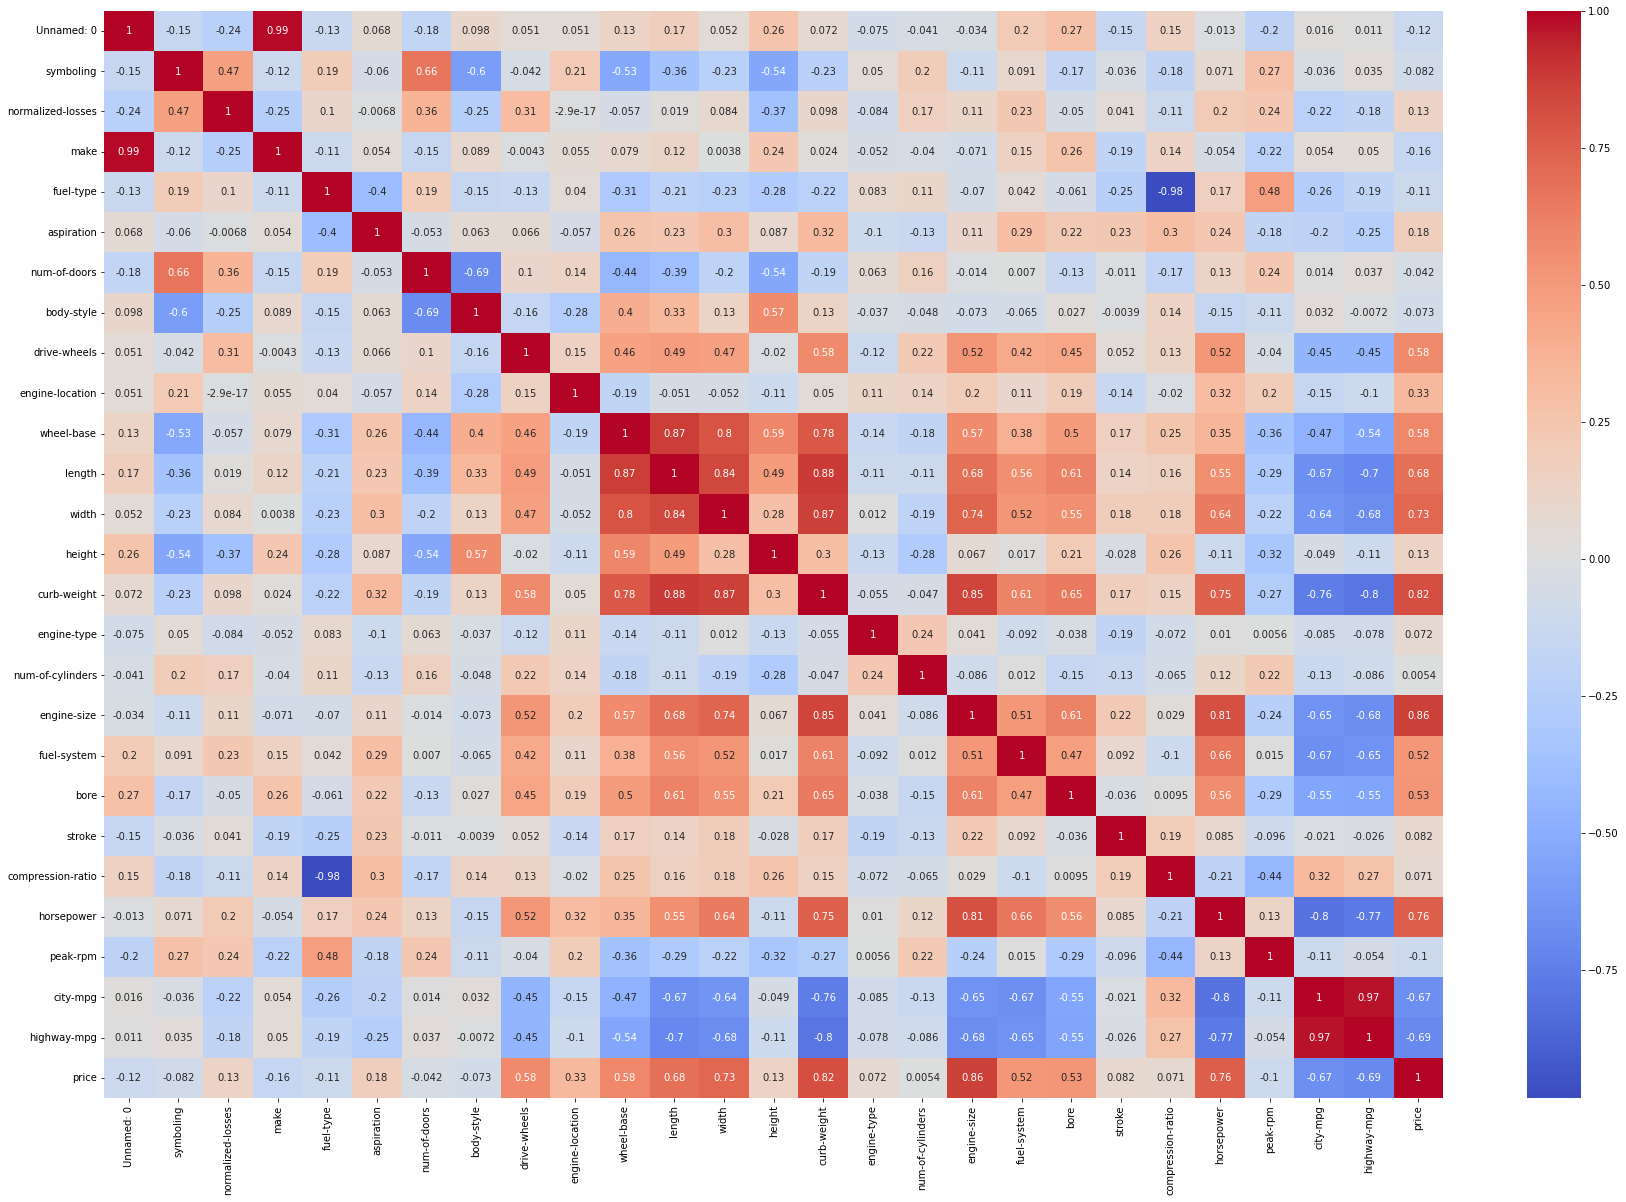

In [16]:
# Displaying a heatmap of the correlations between all columns
plt.figure(figsize=(30, 20))
pearson = df.corr()
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Finding the correlation coefficient of each column with the target variable 'price'
abs(pearson['price'])

Unnamed: 0           0.116555
symboling            0.082201
normalized-losses    0.133999
make                 0.161471
fuel-type            0.110207
aspiration           0.177285
num-of-doors         0.041945
body-style           0.072677
drive-wheels         0.576867
engine-location      0.331013
wheel-base           0.583168
length               0.682986
width                0.728699
height               0.134388
curb-weight          0.820825
engine-type          0.071536
num-of-cylinders     0.005384
engine-size          0.861752
fuel-system          0.516533
bore                 0.525434
stroke               0.081954
compression-ratio    0.070990
horsepower           0.757946
peak-rpm             0.100851
city-mpg             0.667449
highway-mpg          0.690526
price                1.000000
Name: price, dtype: float64

In [18]:
# Finding the columns with the highest correlation with the target variable 'price'
core_target = abs(pearson['price'])

# Correlation coefficient more than 0.5
relevant_features = core_target[core_target>0.5]
relevant_features

drive-wheels    0.576867
wheel-base      0.583168
length          0.682986
width           0.728699
curb-weight     0.820825
engine-size     0.861752
fuel-system     0.516533
bore            0.525434
horsepower      0.757946
city-mpg        0.667449
highway-mpg     0.690526
price           1.000000
Name: price, dtype: float64

# Building Prediction Model

## 1. Using 'engine-size' variable 

In [19]:
# Arrange data into feature matrix and target vector.
# X is the feature, y is the target
X = df['engine-size'].values.reshape((-1, 1))
y = df['price']

In [20]:
from sklearn.model_selection import train_test_split 

# Split the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 1), (41, 1), (164,), (41,))

In [21]:
from sklearn.linear_model import LinearRegression

# Train the model and fit it to the data
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of new unseen data
y_pred1 = model1.predict(X_test)

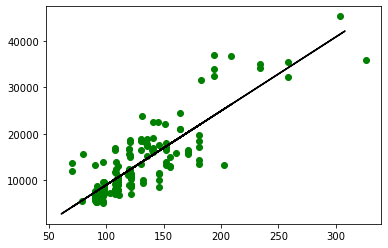

In [23]:
plt1 = plt

# Displaying a scatter plot of training data
plt1.scatter(X_train, y_train, color='g') 

# Displaying a line graph of predicted data
plt1.plot(X_test, y_pred1, color='k') 
plt1.show()

In [24]:
# Calculate the y-intercept of the regression line
print(f"Intercept: {model1.intercept_}")

Intercept: -7092.73204892013


In [25]:
# Calculate the gradient of the regression line
print(f"Gradient: {model1.coef_}")

Gradient: [160.03979626]


In [26]:
# Determine the gradient-intercept form 
print("Equation of the regression line: y = {:.2f}x + {:.2f}".format(model1.coef_[0], model1.intercept_))

Equation of the regression line: y = 160.04x + -7092.73


In [27]:
# Calculate the coefficient of determination
# Shows the accuracy score
r_sq1 = model1.score(X_test, y_test)
print(f"Coefficient of Determination: {r_sq1}")

Coefficient of Determination: 0.7933177927585585


In [28]:
# Measure the performance of the model
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error (MAE): 2775.43863081569
Mean Squared Error (MSE): 16115441.420063652
Root Mean Squared Error (RMSE): 4014.4042422336656


## 2. Using 'curb-weight' variable  

In [29]:
# Arrange data into feature matrix and target vector.
# X is the feature, y is the target
X = df['curb-weight'].values.reshape((-1, 1))
y = df['price']

In [30]:
from sklearn.model_selection import train_test_split 

# Split the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 1), (41, 1), (164,), (41,))

In [31]:
from sklearn.linear_model import LinearRegression

# Train the model and fit it to the data
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of new unseen data
y_pred2 = model2.predict(X_test)

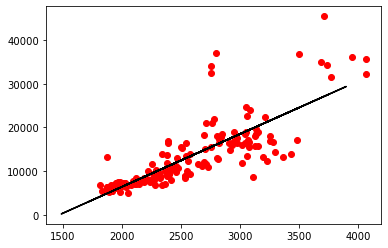

In [33]:
plt2 = plt

# Displaying a scatter plot of training data
plt2.scatter(X_train, y_train, color='r')

# Displaying a line graph of predicted data
plt2.plot(X_test, y_pred2, color='k') 
plt2.show()

In [34]:
# Calculate the y-intercept of the regression line
print(f"Intercept: {model2.intercept_}")

Intercept: -17686.929674386683


In [35]:
# Calculate the gradient of the regression line
print(f"Gradient: {model2.coef_}")

Gradient: [12.05801102]


In [36]:
# Determine the gradient-intercept form 
print("Equation of the regression line: y = {:.2f}x + {:.2f}".format(model2.coef_[0], model2.intercept_))

Equation of the regression line: y = 12.06x + -17686.93


In [37]:
# Calculate the coefficient of determination
# Shows the accuracy score
r_sq2 = model2.score(X_test, y_test)
print(f"Coefficient of Determination: {r_sq2}")

Coefficient of Determination: 0.7155181633299899


In [38]:
# Measure the performance of the model
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error (MAE): 3174.626937657725
Mean Squared Error (MSE): 22181640.283007517
Root Mean Squared Error (RMSE): 4709.738876308061


## 3. Using 'horsepower' variable 

In [39]:
# Arrange data into feature matrix and target vector.
# X is the feature, y is the target
X = df['horsepower'].values.reshape((-1, 1))
y = df['price']

In [40]:
from sklearn.model_selection import train_test_split 

# Split the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 1), (41, 1), (164,), (41,))

In [41]:
from sklearn.linear_model import LinearRegression

# Train the model and fit it to the data
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of new unseen data
y_pred3 = model3.predict(X_test)

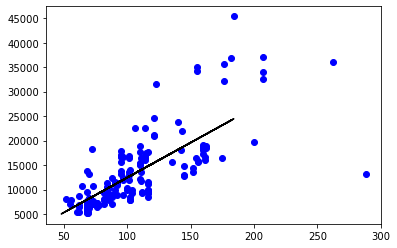

In [43]:
plt3 = plt

# Displaying a scatter plot of training data
plt3.scatter(X_train, y_train, color='b')

# Displaying a line graph of predicted data
plt3.plot(X_test, y_pred3, color='k') 
plt3.show()

In [44]:
# Calculate the y-intercept of the regression line
print(f"Intercept: {model3.intercept_}")

Intercept: -1838.5893453614535


In [45]:
# Calculate the gradient of the regression line
print(f"Gradient: {model3.coef_}")

Gradient: [142.81444576]


In [46]:
# Determine the gradient-intercept form 
print("Equation of the regression line: y = {:.2f}x + {:.2f}".format(model3.coef_[0], model3.intercept_))

Equation of the regression line: y = 142.81x + -1838.59


In [47]:
# Calculate the coefficient of determination
# Shows the accuracy score
r_sq3 = model3.score(X_test, y_test)
print(f"Coefficient of Determination: {r_sq3}")

Coefficient of Determination: 0.5803748694093885


In [48]:
# Measure the performance of the model
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error (MAE): 3780.8070725847906
Mean Squared Error (MSE): 32719043.89195837
Root Mean Squared Error (RMSE): 5720.056283985182


# Model Evaluation

In [49]:
from prettytable import PrettyTable

# Creating a table to display the correlation coeffiecients and accuracy scores of each model
t = PrettyTable(['Independent Variable', 'Correlation Coefficient', 'Accuracy Score']) 
t.add_row(['engine-size', '%.3f' % df['engine-size'].corr(df['price']), '%.3f' % r_sq1]) 
t.add_row(['curb-weight', '%.3f' % df['curb-weight'].corr(df['price']), '%.3f' % r_sq2]) 
t.add_row(['horsepower', '%.3f' % df['horsepower'].corr(df['price']), '%.3f' % r_sq3])
print(t)

+----------------------+-------------------------+----------------+
| Independent Variable | Correlation Coefficient | Accuracy Score |
+----------------------+-------------------------+----------------+
|     engine-size      |          0.862          |     0.793      |
|     curb-weight      |          0.821          |     0.716      |
|      horsepower      |          0.758          |     0.580      |
+----------------------+-------------------------+----------------+


In [50]:
# Creating a table to display the MAE, MSE and RMSE of each model
t = PrettyTable(['Independent Variable', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']) 
t.add_row(['engine-size', '%.0f' % metrics.mean_absolute_error(y_test, y_pred1), '%.0f' % metrics.mean_squared_error(y_test, y_pred1), '%.0f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred1))]) 
t.add_row(['curb-weight', '%.0f' % metrics.mean_absolute_error(y_test, y_pred2), '%.0f' % metrics.mean_squared_error(y_test, y_pred2), '%.0f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred2))]) 
t.add_row(['horsepower', '%.0f' % metrics.mean_absolute_error(y_test, y_pred3), '%.0f' % metrics.mean_squared_error(y_test, y_pred3), '%.0f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred3))])
print(t)

+----------------------+---------------------------+--------------------------+--------------------------------+
| Independent Variable | Mean Absolute Error (MAE) | Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) |
+----------------------+---------------------------+--------------------------+--------------------------------+
|     engine-size      |            2775           |         16115441         |              4014              |
|     curb-weight      |            3175           |         22181640         |              4710              |
|      horsepower      |            3781           |         32719044         |              5720              |
+----------------------+---------------------------+--------------------------+--------------------------------+
